<a href="https://colab.research.google.com/github/svetlanama/math/blob/main/%D0%94%D0%9710_%D0%9C%D0%BE%D1%96%D1%81%D0%B5%D1%94%D0%BD%D0%BA%D0%BE_%D0%A1%D0%B2%D1%96%D1%82%D0%BB%D0%B0%D0%BD%D0%B0_%D0%9E%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80%D1%96%D0%B2%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



# Шлях до файлу (залежить куди ти його поклав)
python_material_folder_name = "neo_data/House_Rent_Dataset.csv" #"Rent Data.csv"

# Check if in Google Colab environment
try:
    from google.colab import drive
    # Mount drive
    drive.mount('/content/drive')
    # Set up path to Python material parent folder
    path_python_material = rf"drive/MyDrive/{python_material_folder_name}"
        # If unsure, print current directory path by executing the following in a new cell:
        # !pwd
    IN_COLAB = True

    import os
    import sys

    # Get the current working directory (notebook's directory)
    notebook_dir = f"{path_python_material}/notebooks"
    print(notebook_dir)

    if notebook_dir not in sys.path:
      sys.path.append(notebook_dir)

except:
    IN_COLAB = False
    # If working locally on Jupyter Notebook, parent folder is one folder up (assuming you are using the folder structure shared at the beginning of the course)
    path_python_material = ".."

print("path_python_material:", path_python_material)


df = pd.read_csv(path_python_material)
display(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive/MyDrive/neo_data/House_Rent_Dataset.csv/notebooks
path_python_material: drive/MyDrive/neo_data/House_Rent_Dataset.csv


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Частина 1. Аналіз та підготовка даних

Проаналізуй діапазони значень, їх середні та дисперсію, розподіли, кореляції, наявність пропущених значень, типи ознак.
Перевір на наявність пропущених значень. За наявності заповни їх або видали рядки з пропусками.
За наявності бінарних ознак заміни значення цих ознак на 0 та 1.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Завантаження датасету ---
df = pd.read_csv(path_python_material)
print("✅ Форма датасету:", df.shape)
display(df.head())

# --- 2. Базова статистика ---
print("\n=== INFO ===")
print(df.info())

print("\n=== Описова статистика (числові колонки) ===")
display(df.describe().T)  # середні, std, min, max (діапазони видно)

# дисперсія для числових колонок
print("\n=== Дисперсія числових ознак ===")
display(df.var(numeric_only=True))




✅ Форма датасету: (4746, 12)


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner



=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None

=== Описова статистика (числові колонки) ===


,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0



=== Дисперсія числових ознак ===


,0
BHK,6.926499e-01
Rent,6.100612e+09
Size,4.022126e+05
Bathroom,7.823963e-01


In [33]:
# --- 3. Перевірка пропусків ---
na_tbl = (
    pd.DataFrame({
        "na_count": df.isna().sum(),
        "na_%": df.isna().mean()*100
    })
    .sort_values("na_count", ascending=False)
)
print("\n=== Пропущені значення ===")
display(na_tbl[na_tbl.na_count > 0])

# Заповнення: числові -> медіана, категоріальні -> мода
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())
    else:
        if df[col].isna().any():
            mode = df[col].mode(dropna=True)
            if len(mode) > 0:
                df[col] = df[col].fillna(mode.iloc[0])

print("✅ Пропуски заповнено")





=== Пропущені значення ===


,na_count,na_%


✅ Пропуски заповнено


In [34]:
# --- 4. Типи ознак ---
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols  = df.select_dtypes(include=["object"]).columns.tolist()

print("\nЧислові:", numeric_cols)
print("Категоріальні:", cat_cols)

# --- 5. Бінарні ознаки ---
binary_like_cols = []
for col in cat_cols:
    uniq = df[col].dropna().unique()
    if len(uniq) == 2:  # якщо рівно 2 значення
        binary_like_cols.append(col)

def make_binary_01(series: pd.Series):
    vals = sorted(series.dropna().unique(), key=lambda v: str(v))
    return series.map({vals[0]: 0, vals[1]: 1}).astype(int)

for col in binary_like_cols:
    df[col] = make_binary_01(df[col])

print("✅ Бінарні object-колонки перетворені у 0/1:", binary_like_cols)




Числові: ['BHK', 'Rent', 'Size', 'Bathroom']
Категоріальні: ['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']
✅ Бінарні object-колонки перетворені у 0/1: []


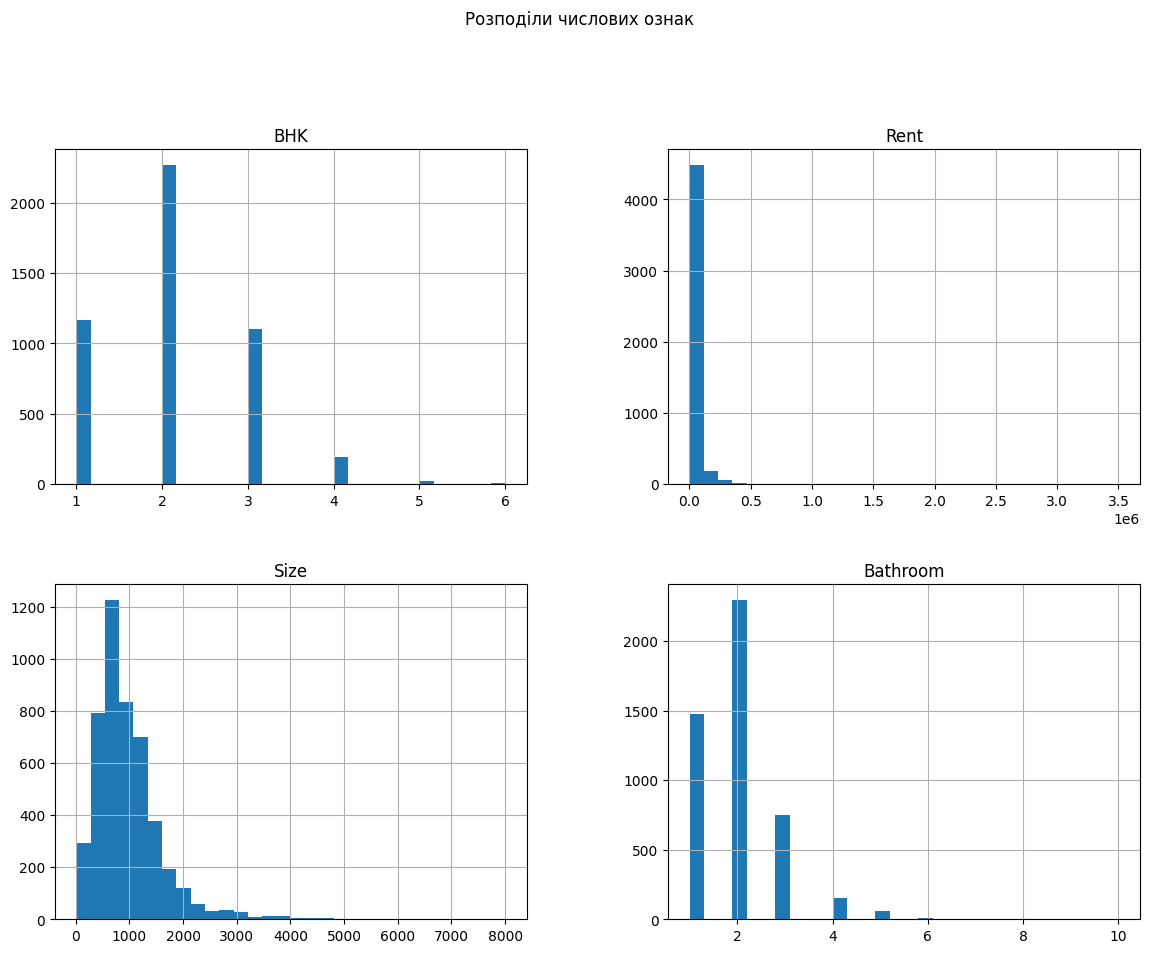

In [35]:
# --- 6. Візуалізація розподілів ---
if numeric_cols:
    df[numeric_cols].hist(figsize=(14, 10), bins=30)
    plt.suptitle("Розподіли числових ознак", y=1.02)
    plt.show()



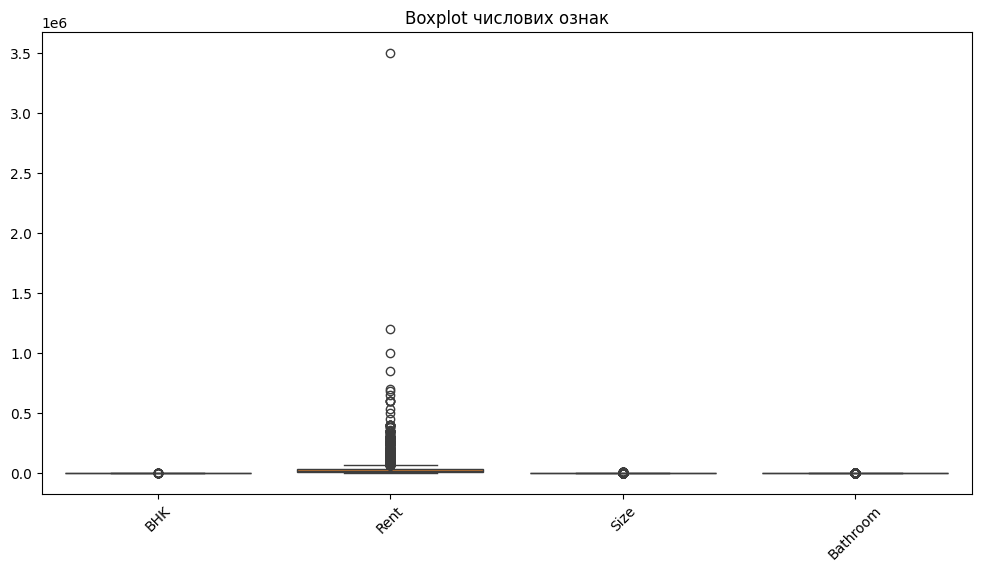

In [36]:
# Boxplot для виявлення викидів
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot числових ознак")
plt.xticks(rotation=45)
plt.show()




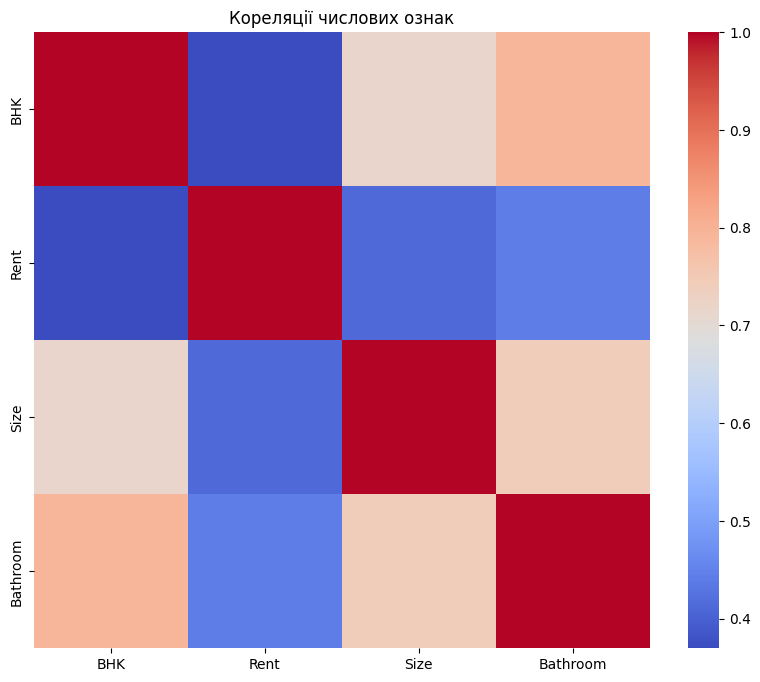


✅ Аналіз та базове чищення завершено


In [37]:
# --- 7. Кореляції ---
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    corr = df[numeric_cols].corr(numeric_only=True)
    sns.heatmap(corr, annot=False, cmap="coolwarm", square=True)
    plt.title("Кореляції числових ознак")
    plt.show()

print("\n✅ Аналіз та базове чищення завершено")